## Blinded cameras clustering

Here the dataset is a pandas DataFrame generated from a response.drdf file. 
The file can be found at "/storage/gpfs_data/neutrino/SAND-LAr/SAND-LAr-GRAIN-CALORIMETRY/data/cube_production/production1/cube_X0_Y0_Z-3/output/response_cut.drdf".

In [1]:
import os 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
import sklearn.metrics as metric
import skimage
from joblib import Parallel, delayed

### Read data from pickle format

Compose data array from dataframe column, keeping different cameras in the rows, while columns represent the pixels

In [2]:
#module_path = os.path.abspath(os.path.join('..'))
df = pd.read_pickle("blind_cameras_dataset\\drdf_arrays.pkl")

df2arr = df.pixels.to_numpy()
arr3d = np.stack(df2arr)
data = arr3d.reshape(df2arr.shape[0],32*32)


In [3]:
# NB this os the proof of how the reshape method works!!
# t0 = test[0]
# t1 = test1[0]
# d = np.empty(0)
# for i in range(32):
#     for j in range(32):
#         diff = t0[i,j] - t1[i*32+j]
#         d = np.apltend(d,diff)
        
# print(np.min(d), np.max(d))

### Show distribution of data from the entire file

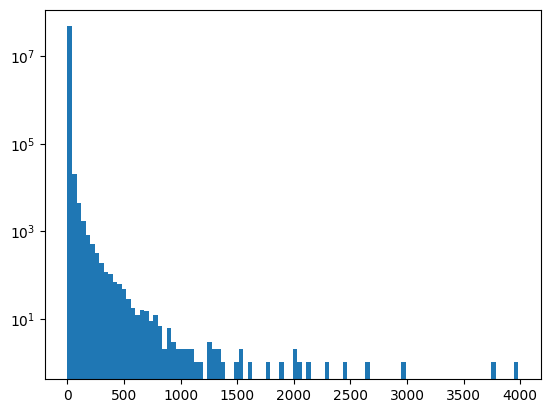

In [4]:
plt.hist(data.reshape(-1,1),100)
plt.yscale('log')

### Filter data

In [6]:
def task(camera):
    thr = skimage.filters.threshold_minimum(image=camera, nbins=1024, max_num_iter=1000000)
    return thr

filter = False

if filter:
    thresholds = Parallel(n_jobs=5)(delayed(task)(i) for i in arr3d[:2000])
    
    print(thresholds)
    thr = np.array(thresholds).reshape(-1,1)
    filt = (data[:1000] > thr)*thr
    filt.shape

N.B. takes 14 min

In [7]:
if not filter:
    hess = skimage.filters.hessian(arr3d)
    hess.shape
    filt = (hess*arr3d).reshape(-1,1024)

### Use the KMean algorithm to clusterise the datasample.
The same data are the processed to check the clusterization.

In [8]:
# Declaring Model
# model = KMeans(n_clusters=3)
# model1 = KMeans(init="random", n_clusters=3, n_init=20, random_state=0)
# model2 = KMeans(init="k-means++", n_clusters=3, n_init=20, random_state=0)
model3 = KMeans(init="k-means++", n_clusters=4, n_init=20, random_state=0)
# Fitting Model
# model.fit(data)
# model1.fit(data)
# model2.fit(data)
model3.fit(filt)

# print(np.count_nonzero(model1.labels_ == 0), np.count_nonzero(model1.labels_ == 1), np.count_nonzero(model1.labels_ == 2))
# print(np.count_nonzero(model2.labels_ == 0), np.count_nonzero(model2.labels_ == 1), np.count_nonzero(model2.labels_ == 2))
print(np.count_nonzero(model3.labels_ == 0), np.count_nonzero(model3.labels_ == 1), np.count_nonzero(model3.labels_ == 2), np.count_nonzero(model3.labels_ == 3))#, np.count_nonzero(model3.labels_ == 4))

46500 19 1 448


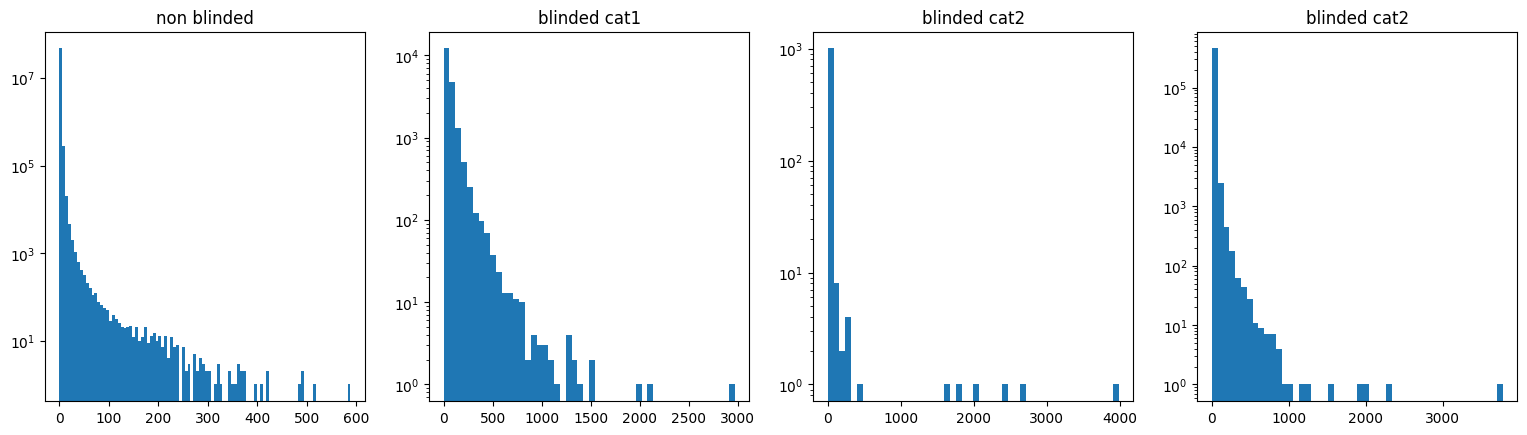

In [11]:
lb3 = model3.predict(filt)
#bl3 = np.where(lb3 == 2)
#bl3 = np.where((lb3 == 1) | (lb3 == 2) | (lb3 == 3) | (lb3 == 4))
#   blind_in_common3 = np.intersect1d(blind_candidate, blind_candidate[bl3[0]])
#blind_in_common3 = np.intersect1d(blind_candidate, bl3[0])
#   print('common blind =', blind_in_common3.size,'out of',bl3[0].size, 'predicted.\nCandidates were',blind_candidate.size)
#   blind_not_in_common3 = np.setdiff1d(blind_candidate[bl3[0]], blind_in_common3, assume_unique=True)
#blind_not_in_common3 = np.setdiff1d(bl3[0], blind_in_common3, assume_unique=True) #returns the value in arr1 which are not in arr2
#   print('not in common :',blind_not_in_common3)

# plot photon hit distribution of cluster 0,1,2 separately
fig, ax = plt.subplots(1,4)

#ax[0].hist(data[np.where(lb3 == 0)[0]].reshape(-1,1),100)
ax[0].hist(data[np.where(lb3 == 0)[0]].reshape(-1,1),100)
ax [0].set_yscale('log')
ax[0].set_title('non blinded')

#ax[1].hist(data[np.where(lb3 == 1)[0]].reshape(-1,1),50)
ax[1].hist(data[np.where(lb3 == 1)[0]].reshape(-1,1),50)
ax [1].set_yscale('log')
ax[1].set_title('blinded cat1')

ax[2].hist(data[np.where(lb3 == 2)[0]].reshape(-1,1),50)
#ax[2].hist(data[np.where(lb3 == 1)[0]].reshape(-1,1),50)
ax [2].set_yscale('log')
ax[2].set_title('blinded cat2')

ax[3].hist(data[np.where(lb3 == 3)[0]].reshape(-1,1),50)
#ax[2].hist(data[np.where(lb3 == 1)[0]].reshape(-1,1),50)
ax [3].set_yscale('log')
ax[3].set_title('blinded cat2')


fig.set_figwidth(19)

In [12]:
np.where(lb3 == 3)[0]

array([   17,    63,    64,   245,   397,   473,   671,   701,   929,
         970,   975,  1005,  1127,  1203,  1233,  1274,  1385,  1461,
        1507,  1537,  1603,  1689,  1841,  2069,  2373,  2494,  2525,
        2723,  2799,  2804,  2829,  2874,  3133,  3284,  3285,  3665,
        3969,  4015,  4273,  4395,  4729,  4957,  5154,  5261,  5413,
        5458,  5463,  5464,  5489,  5717,  5793,  5869,  6249,  6446,
        6477,  6533,  7085,  7131,  7160,  7161,  7283,  7360,  7510,
        7541,  8068,  8073,  8077,  8301,  8347,  8377,  8528,  8574,
        8576,  8605,  8651,  8682,  8909,  9107,  9223,  9593,  9745,
        9821,  9897,  9943,  9973, 10125, 10201, 10247, 10581, 10961,
       11037, 11265, 11569, 11616, 11797, 12177, 12299, 12405, 12481,
       12633, 12785, 13165, 13241, 13242, 13287, 13317, 13363, 13364,
       13506, 13621, 13673, 13696, 13697, 13925, 13969, 14001, 14002,
       14077, 14153, 14199, 14229, 14351, 14533, 14609, 14660, 14837,
       14989, 15035,

In [13]:
filtered_1 = data[np.where((lb3 == 1) | (lb3 == 2) | (lb3 == 3))]
filtered_0 = data[np.where(lb3 == 0)]

index_1 = np.empty(0)

for img in filtered_1:
    if np.max(img)/np.mean(img) > 7:
        index_1 = np.append(index_1, 1)
    else :
        index_1 = np.append(index_1, 0)

print(index_1[index_1 == 1].size, 'over', filtered_1.shape[0])

filtered_1_1 = filtered_1[np.where(index_1 == 1)]

print(np.where(index_1 == 1))

197 over 468
(array([  1,   6,   8,  10,  11,  13,  14,  16,  19,  21,  23,  26,  28,
        29,  30,  32,  34,  40,  43,  47,  49,  53,  54,  56,  61,  62,
        63,  65,  67,  69,  73,  74,  75,  77,  78,  80,  84,  86,  87,
        91,  92,  96, 101, 102, 104, 105, 109, 110, 112, 113, 116, 117,
       120, 123, 126, 128, 131, 134, 135, 136, 139, 144, 146, 147, 149,
       150, 152, 155, 156, 158, 161, 162, 164, 165, 166, 170, 171, 174,
       180, 186, 192, 196, 197, 199, 200, 204, 205, 210, 212, 213, 216,
       217, 220, 224, 225, 229, 230, 232, 235, 236, 238, 239, 241, 243,
       247, 248, 260, 265, 268, 272, 275, 278, 280, 281, 283, 284, 286,
       288, 289, 292, 296, 297, 302, 304, 307, 308, 309, 314, 316, 318,
       320, 321, 322, 324, 325, 326, 330, 331, 332, 336, 340, 341, 348,
       349, 351, 355, 356, 360, 361, 365, 371, 372, 376, 377, 380, 387,
       388, 389, 390, 393, 394, 396, 402, 404, 405, 406, 407, 408, 409,
       413, 414, 418, 420, 423, 424, 425, 426, 428

### Plot photon distribution for 1 camera

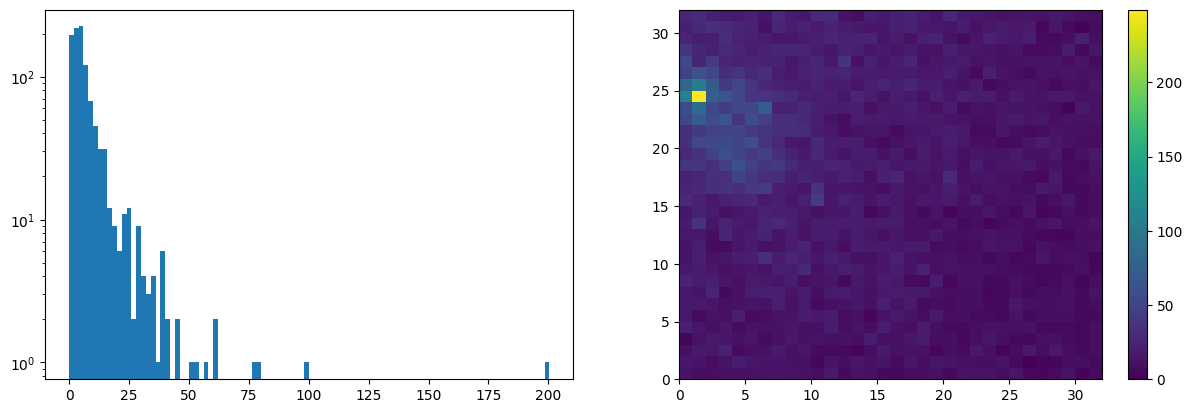

In [18]:
data_num = 1

fig, ax = plt.subplots(1,2)
ax[0].hist(filtered_1_1[data_num],100)
ax[0].set_yscale('log')

#camera = np.reshape(df.iloc[162].pixels, (32,32))
cam = ax[1].pcolormesh(filtered_1[data_num].reshape(32,32))
#cam = ax[1].pcolormesh(arr3d[data_num])
plt.colorbar(cam)

fig.set_figwidth(15)

### save cameras to pdf

In [31]:
write_pdf = True
if (filtered_1_1.shape[0] < 1000) & (write_pdf) :
    pdf = PdfPages('blinded_filtered.pdf')
    for num in filtered_1_1:
        fig = plt.figure()
        cam = plt.pcolormesh(num.reshape(32,32))
        plt.colorbar(cam)
        #plt.title('cam-'+str(num))
        pdf.savefig(fig)
        plt.close()
    pdf.close()
    
if (filtered_1.shape[0] < 1000) & (write_pdf) :
    pdf = PdfPages('blinded.pdf')
    for num in filtered_1:
        fig = plt.figure()
        cam = plt.pcolormesh(num.reshape(32,32))
        plt.colorbar(cam)
        #plt.title('cam-'+str(num))
        pdf.savefig(fig)
        plt.close()
    pdf.close()

#### Save to pickle file

In [25]:
save = True
if save:
    np.save('blind_cameras_dataset/blinded_filtered.npy',filtered_1_1)
    np.save('blind_cameras_dataset/blinded.npy',filtered_1)

#### Read from pickle file

In [29]:
read = False
if read:
    with open('blind_cameras_dataset/blinded.npy', 'rb') as f:
        load_blind = np.load(f)